In [1]:
%matplotlib inline
import torch
import numpy as np
import timeit
import matplotlib.pyplot as plt
import matplotlib

# What will we be doing

1. Review multivariable calculus
2. Compute gradients
3. Plot them

This time we will be using PyTorch so you'll have a chance to experience the package.

# Recall Gradients

Let $f(x,y)$ be a function in 2 dimension.
The gradient of a scalar function is a {\bf vector} that contain derivatives in each direction.

$$ \nabla f(x,y)= \begin{pmatrix} {\frac {\partial f}{\partial x}} \\ {\frac {\partial f}{\partial y}} \end{pmatrix} $$ 


Example if
$$ f(x,y) = \sin(xy) $$
Then
$$ \nabla f(x,y)= \begin{pmatrix}  y\cos(xy) \\ x\cos(xy) \end{pmatrix} $$ 



# Numerical Computation of derivatives

We can use the same ideas we used in 1D to compute the gradients of a function. Below is the simple change that is done to differentiate the function in the $x$ direction. 

In [2]:
def computeGradients(f,hx,hy):
    
    dfx = (f[2:,:] - f[0:-2,:])/(2*hx)
    dfy = (f[:,2:] - f[:,0:-2])/(2*hy)
    
    return dfx, dfy

# Testing the gradient

We now use a similar trick to test the gradient. This time we use PyTorch. A very useful command in 2D is to constract a grid.
Here is the way its done in PyTorch

In [3]:
xv, yv = torch.meshgrid([torch.arange(0,5), torch.arange(0,3)])
print(xv)
print(yv)

tensor([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])
tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])


In [4]:
pi = 3.1415926535

for i in np.arange(2,10):
    n = 2**i
    x, y = torch.meshgrid([torch.arange(0,n+2), torch.arange(0,n+2)])

    x = x/(n+1)
    y = y/(n+1)

    hx = 1/(n+1)
    hy = 1/(n+1)
    
    
    f      = np.sin(2*pi*x*y)   
    dfxTrue = 2*pi*y*np.cos(2*pi*x*y)
    dfyTrue = 2*pi*x*np.cos(2*pi*x*y)


    dfxComp, dfyComp = computeGradients(f,hx,hy)
    
    # dont use boundaries
    dfxTrue = dfxTrue[1:-1,:]
    dfyTrue = dfyTrue[:,1:-1]
    

    resx = torch.abs(dfxTrue - dfxComp)
    resy = torch.abs(dfyTrue - dfyComp)

    print(hx,  '      ',   torch.max(resx).item(), hy,  '      ',   torch.max(resy).item())

0.2        1.2360990047454834 0.2        1.2360990047454834
0.1111111111111111        0.46805810928344727 0.1111111111111111        0.46805810928344727
0.058823529411764705        0.13965654373168945 0.058823529411764705        0.13965654373168945
0.030303030303030304        0.03772783279418945 0.030303030303030304        0.03772783279418945
0.015384615384615385        0.009758949279785156 0.015384615384615385        0.009758949279785156
0.007751937984496124        0.0024933815002441406 0.007751937984496124        0.0024933815002441406
0.0038910505836575876        0.0006351470947265625 0.0038910505836575876        0.0006580352783203125
0.001949317738791423        0.0003247261047363281 0.001949317738791423        0.0002865791320800781


# Class/homeworek assignmets

Modify the following code to handle boundary points 

In [5]:
def computeGradientsBC(f,hx,hy):
    
    n = f.shape
    dfx = torch.zeros(n[0],n[1])
    dfy = torch.zeros(n[0],n[1])
    
    dfx[1:-1,:] = (f[2:,:] - f[0:-2,:])/(2*hx)
    dfy[:,1:-1] = (f[:,2:] - f[:,0:-2])/(2*hy)
    
    # Your code here
    #dfx[0,:] = 
    #dfy[-1,:] =
    #dfy[:,0] = 
    #dfy[:,-1] =
    
    return dfx, dfy

# Class/homeworek assignmets

Design a test for the code similar to the one we did in 1D 

# Plotting the gradients and visualizing things

Finally, we would like to plot and visualize the gradients and the fields. 
We use the following example to do that

In [6]:
def peaksFun(x,y):
    z =  3*(1-x)**2 * torch.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*torch.exp(-x**2-y**2) - 1/3*torch.exp(-(x+1)**2 - y**2)
    
    return z

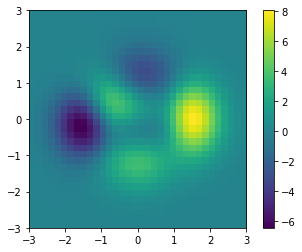

In [7]:
n = 32
t1 = torch.arange(0,n+2)
t2 = torch.arange(0,n+2)
x, y = torch.meshgrid([t1, t2])

# Convert to single precision
x = x.float()
y = y.float()

x = 6*x/(n+1) - 3
y = 6*y/(n+1) - 3

z = peaksFun(x,y)

# now use matplotlib to plot the function - note we need to convert to numpy
Z = z.numpy()
ext = [-3 , 3, -3 , 3]
plt.imshow(Z,extent=ext)
plt.colorbar()

We can now compute and plot the gradients of f

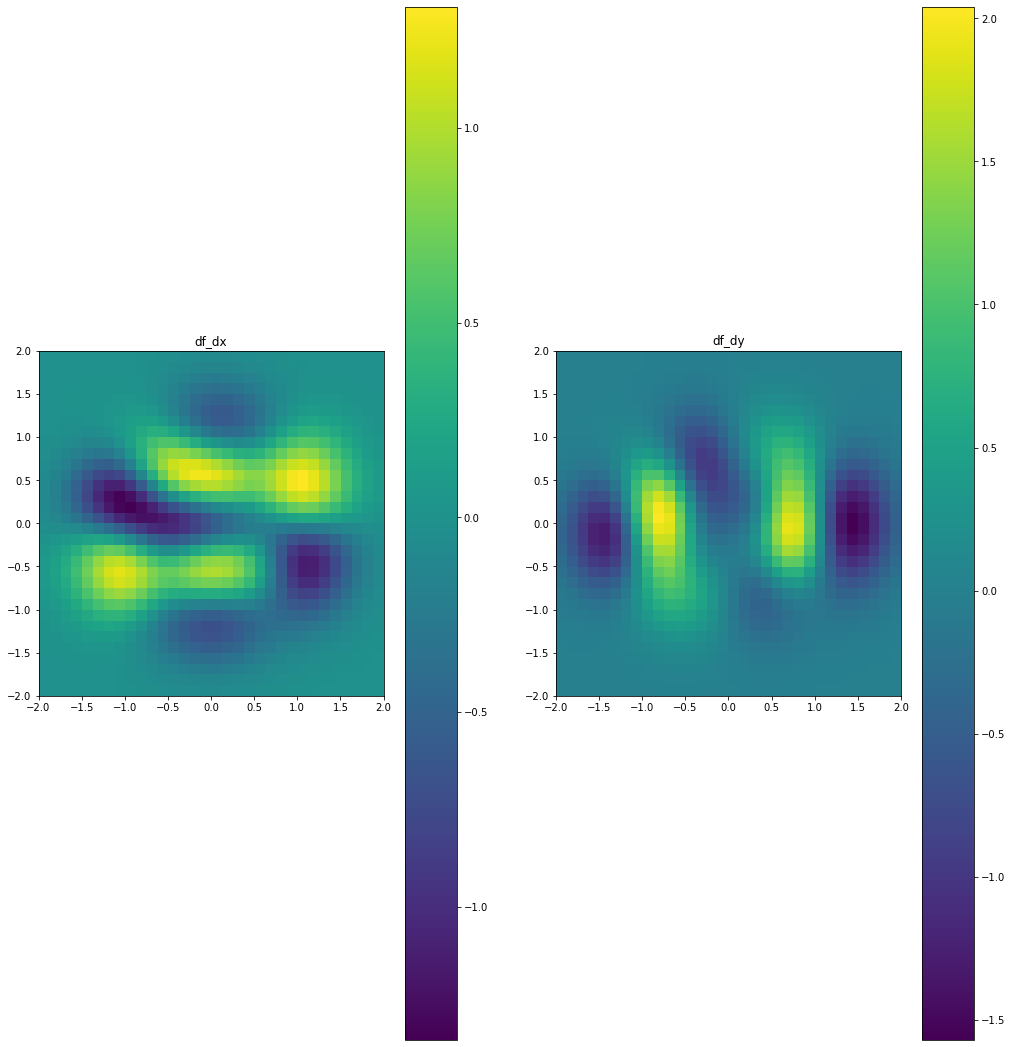

In [8]:
hx = t1[1]-t1[0]
hy = t2[1]-t2[0]
fx,fy = computeGradients(z,hx,hy)

# Get reid of boundaries
fx = fx[:,1:-1]
fy = fy[1:-1,:]

# Now plot it
FX = fx.numpy(); FY = fy.numpy();
ext = [-3+hx , 3-hx, -3+hy , 3-hy]

fig = plt.figure(figsize=(17, 19))
gs =  matplotlib.gridspec.GridSpec(nrows=1, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
I1 = ax0.imshow(FX,extent=ext)
ax0.set_title('df_dx');
fig.colorbar(I1);

ax0 = fig.add_subplot(gs[0, 1])
I2 = ax0.imshow(FY,extent=ext)
ax0.set_title('df_dy');
fig.colorbar(I2);

We can have more fun plots. The gradient is a vector so we can plot it at every point

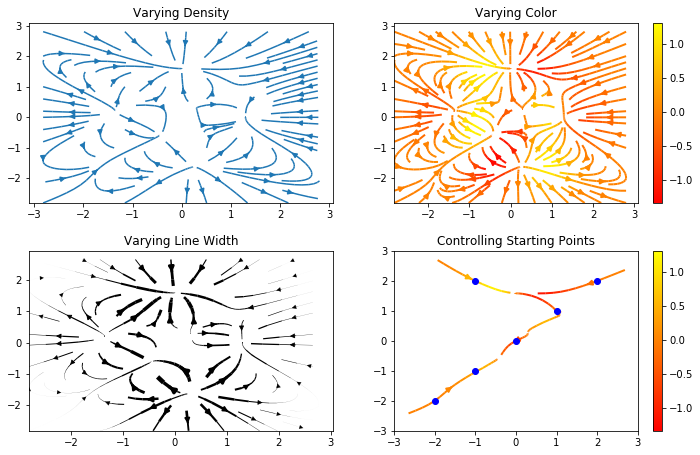

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
# Convert to numpy and transpose
X = x[1:-1,1:-1].t().numpy(); Y = y[1:-1,1:-1].t().numpy()
U = fx.t().numpy()
V = fy.t().numpy()
absGrad = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*absGrad / absGrad.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w));